# 1 Objetivo
Comparar modelos de supervisados a través de la aplicación de algoritmos de predicción de precios de automóviles determinando el estadístico del error cuadrático medio (rmse).

# 2 Descripción
- Se cargan los datos previamente preparados de la dirección https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/CarPrice_Assignment_Numericas_Preparado.csv
- Se crean datos de entrenamiento al 80%
- Se crean datos de validación al 20%
- Se crea el modelo regresión múltiple con datos de entrenamiento
- Con este modelo se responde a preguntas tales como:
    - ¿cuáles son variables que están por encima del 90% de confianza como predictores?,
        - ¿Cuál es el valor de R Square Adjusted o que tanto representan las variables dependientes al precio del vehículo?
        - Se generan predicciones con datos de validación
    - Se determina el estadístico RMSE para efectos de comparación
- Se crea el modelo árboles de regresión con los datos de entrenamiento
    - Se identifica la importancia de las variables sobre el precio
    - Se visualiza el árbol de regresión y sus reglas de asociación
- Se hacen predicciones con datos de validación
- Se determinar el estadístico RMSE para efectos de comparación
- Se construye el modelo bosques aleatorios con datos de entrenamiento y con 20 árboles simulados
    - Se identifica la importancia de las variables sobre el precio
    - Se generan predicciones con datos de validación
    - Se determina el estadístico RMSE para efectos de comparación
- Al final del caso, se describe una interpretación personal

# 3 Desarrollo
## 3.1 Cargar librerías

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y moYdelado
from sklearn.model_selection import train_test_split

# Estadisticos y lineal múltiple
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

# Arbol de regresion
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

# Random Forest
from sklearn.ensemble import RandomForestRegressor


# Metricas
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## 3.2 Cargar datos

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/CarPrice_Assignment_Numericas_Preparado.csv")
datos

,Unnamed: 0,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## 3.3 Exploración de datos

In [3]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (205, 16)


In [4]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['Unnamed: 0', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
datos.dtypes

Unnamed: 0            int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## 3.5 Limpiar datos
Dejar solo las variables necesarias:

‘symboling’, ‘wheelbase’, ‘carlength’, ‘carwidth’, ‘carheight’, ‘curbweight’, ‘enginesize’, ‘boreratio’, ‘stroke’, ‘compressionratio’, ‘horsepower’, ‘peakrpm’, ‘citympg’, ‘highwaympg’, ‘price’



In [6]:
datos = datos[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
datos.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
datos

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


### 3.5.1 Datos de entrenamiento y validación
Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 1550.

In [8]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos.drop(columns = "price"), datos['price'],train_size = 0.80,  random_state = 1550)

#### 3.5.1.1 Datos de entrenamiento

In [9]:
X_entrena

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200,19,24
131,2,96.1,176.8,66.6,50.5,2460,132,3.46,3.90,8.7,90,5100,23,31
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
22,1,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.4,68,5500,31,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,5400,16,22
181,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24
137,2,99.1,186.6,66.5,56.1,2847,121,3.54,3.07,9.0,160,5500,19,26
25,1,93.7,157.3,63.8,50.6,1989,90,2.97,3.23,9.4,68,5500,31,38


#### 3.5.1.2 Datos de validación


In [10]:
X_valida

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
114,0,114.2,198.9,68.4,58.7,3485,152,3.70,3.520,21.0,95,4150,25,25
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.400,8.5,110,5500,19,25
17,0,110.0,197.0,70.9,56.3,3505,209,3.62,3.390,8.0,182,5400,15,20
96,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.290,9.4,69,5200,31,37
149,0,96.9,173.6,65.4,54.9,2650,108,3.62,2.640,7.7,111,4800,23,23
54,1,93.1,166.8,64.2,54.1,1950,91,3.08,3.150,9.0,68,5000,31,38
18,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.030,9.5,48,5100,47,53
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.400,23.0,106,4800,26,27
55,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23
109,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.190,8.4,97,5000,19,24


## 3.6 Modelos Supervisados
### 3.6.1 Modelo de regresión lineal múltiple. (RM)
Se construye el modelo de regresión lineal múltiple (rm)

In [11]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

#### 3.6.1.1 Coeficientes
Solo se muestran los coeficientes de: β1,β2,...βn

In [12]:
modelo_rm.coef_

array([ 3.20483495e+02,  1.81473702e+02, -9.84528494e+01,  5.48143305e+02,
        1.96360303e+02,  1.60204870e+00,  1.19134040e+02, -3.10661560e+02,
       -3.21852566e+03,  2.76457735e+02,  3.03452005e+01,  2.20477786e+00,
       -4.13860371e+02,  3.13394387e+02])

- En modelos lineales múltiples el estadístico Adjusted R-squared: 0.8506 significa que las variables independientes explican aproximadamente el 85.06% de la variable dependiente precio.

In [13]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.850659059647396


#### 3.6.1.2 Predicciones del modelo rm

In [14]:
predicciones_rm = modelo_rm.predict(X_valida)
print(predicciones_rm[:-1])

[18070.62219407 15505.01163637 30034.21512667  6307.87004523
  9751.60514123  5502.24394609  -858.62355979 19334.75418711
  8445.78788066 15607.63468198 20157.59949679 14411.06872706
  9060.40755309  6655.29501041  6275.82907117 10318.72677508
 14184.6403578  21043.71038023  8075.21079955 10136.97679695
 36060.06003789 10280.06346188  9711.40198066  6222.96146398
 17184.30396573  5505.59866035 11693.26897311  5080.90723226
 22878.33645804 13923.50641924 11274.97131747 18603.15452952
 10931.06988143 18182.27222876  7546.09619684 18628.03866053
  6718.09391795  5770.01045032  9835.43490809  8822.20189103]


#### 3.6.1.3 Tabla comparativa


In [15]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_rm.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
114          0      114.2      198.9      68.4       58.7        3485   
5            2       99.8      177.3      66.3       53.1        2507   
17           0      110.0      197.0      70.9       56.3        3505   
96           1       94.5      165.3      63.8       54.5        1971   
149          0       96.9      173.6      65.4       54.9        2650   
54           1       93.1      166.8      64.2       54.1        1950   
18           2       88.4      141.1      60.3       53.2        1488   
203         -1      109.1      188.8      68.9       55.5        3217   
55           3       95.3      169.0      65.7       49.6        2380   
109          0      114.2      198.9      68.4       58.7        3230   
201         -1      109.1      188.8      68.8       55.5        3049   
133          2       99.1      186.6      66.5       56.1        2695   
146          0       97.0      173.5      65.4     

#### 3.6.1.4 RMSE modelo de rm


In [16]:
rmse_rm = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_rm,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_rm}")

El error (rmse) de test es: 2647.783662998221


o

In [17]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_rm)))

Root Mean Squared Error RMSE: 2647.783662998221


### 3.6.2 Modelo de árbol de regresión (AR)
Se construye el modelo de árbol de regresión (ar)

In [18]:
modelo_ar = DecisionTreeRegressor(
            #max_depth         = 3,
            random_state      = 2022
          )

Entrenar el modelo

In [19]:
modelo_ar.fit(X_entrena, Y_entrena)

DecisionTreeRegressor(random_state=2022)

#### 3.6.2.1 Visualización de árbol de regresión


Profundidad del árbol: 16


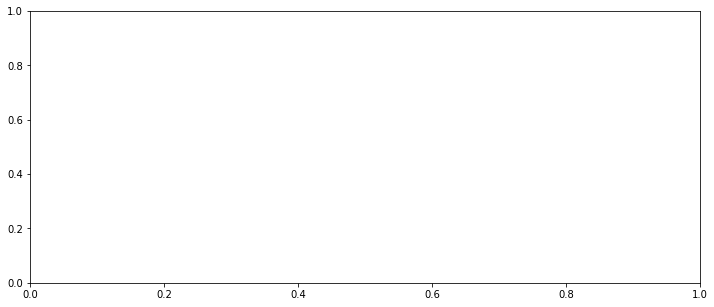

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_ar.get_depth()}")

In [21]:
print(f"Número de nodos terminales: {modelo_ar.get_n_leaves()}")

Número de nodos terminales: 154


In [22]:
plot = plot_tree(
            decision_tree = modelo_ar,
            feature_names = datos.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

plot

[Text(0.7749857088414634, 0.9705882352941176, 'enginesize <= 182.0\nsamples = 164\nvalue = 13457.32'),
 Text(0.5941787347560976, 0.9117647058823529, 'curbweight <= 2544.0\nsamples = 148\nvalue = 11205.17'),
 Text(0.3905297256097561, 0.8529411764705882, 'curbweight <= 2291.5\nsamples = 94\nvalue = 8403.69'),
 Text(0.22198932926829268, 0.7941176470588235, 'curbweight <= 2006.0\nsamples = 57\nvalue = 7231.29'),
 Text(0.13414634146341464, 0.7352941176470589, 'horsepower <= 69.5\nsamples = 24\nvalue = 6424.1'),
 Text(0.10365853658536585, 0.6764705882352942, 'curbweight <= 1987.0\nsamples = 19\nvalue = 6219.68'),
 Text(0.07926829268292683, 0.6176470588235294, 'highwaympg <= 38.5\nsamples = 15\nvalue = 6034.13'),
 Text(0.04878048780487805, 0.5588235294117647, 'curbweight <= 1902.5\nsamples = 10\nvalue = 6215.2'),
 Text(0.024390243902439025, 0.5, 'highwaympg <= 37.5\nsamples = 4\nvalue = 5791.5'),
 Text(0.012195121951219513, 0.4411764705882353, 'citympg <= 30.5\nsamples = 2\nvalue = 5347.0'),


Reglas de asociación del árbol

In [23]:
texto_modelo = export_text(
                    decision_tree = modelo_ar,
                    feature_names = list(datos.drop(columns = "price").columns)
               )
print(texto_modelo)

|--- enginesize <= 182.00
|   |--- curbweight <= 2544.00
|   |   |--- curbweight <= 2291.50
|   |   |   |--- curbweight <= 2006.00
|   |   |   |   |--- horsepower <= 69.50
|   |   |   |   |   |--- curbweight <= 1987.00
|   |   |   |   |   |   |--- highwaympg <= 38.50
|   |   |   |   |   |   |   |--- curbweight <= 1902.50
|   |   |   |   |   |   |   |   |--- highwaympg <= 37.50
|   |   |   |   |   |   |   |   |   |--- citympg <= 30.50
|   |   |   |   |   |   |   |   |   |   |--- value: [5195.00]
|   |   |   |   |   |   |   |   |   |--- citympg >  30.50
|   |   |   |   |   |   |   |   |   |   |--- value: [5499.00]
|   |   |   |   |   |   |   |   |--- highwaympg >  37.50
|   |   |   |   |   |   |   |   |   |--- peakrpm <= 5250.00
|   |   |   |   |   |   |   |   |   |   |--- value: [6095.00]
|   |   |   |   |   |   |   |   |   |--- peakrpm >  5250.00
|   |   |   |   |   |   |   |   |   |   |--- value: [6377.00]
|   |   |   |   |   |   |   |--- curbweight >  1902.50
|   |   |   |   |   |   

#### 3.6.2.2 Importancia de los predictores


In [24]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "price").columns, 
                            'importancia': modelo_ar.feature_importances_}
                            )
                            
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo


,predictor,importancia
6,enginesize,0.693291
5,curbweight,0.222946
3,carwidth,0.020179
12,citympg,0.017545
13,highwaympg,0.011791
11,peakrpm,0.010222
10,horsepower,0.007503
9,compressionratio,0.005428
7,boreratio,0.003939
8,stroke,0.002689


Estos sería los predictores más importantes para el modelo de árbol de regresión enginesize, curbweight, peakrpm, carheight y wheelbase

#### 3.6.2.3 Predicciones del modelo (ar)

In [25]:
predicciones_ar = modelo_ar.predict(X = X_valida)
predicciones_ar

array([13860. , 13950. , 30760. ,  6695. , 13845. ,  6695. ,  5572. ,
       22625. , 11845. , 16630. , 21485. , 15510. ,  8238. ,  8358. ,
        6695. ,  8195. , 17669. , 11048. ,  7788. ,  6989. , 37028. ,
        8845. , 13645. ,  6849. , 13845. ,  6575. ,  8921. ,  6479. ,
       17199. , 11199. , 13645. , 18920. ,  9980. , 16695. , 21105. ,
       16900. ,  6938. ,  8916.5,  9095. ,  6918. ,  6785. ])

#### 3.6.2.4 Tabla comparativa

In [26]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_ar.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
114          0      114.2      198.9      68.4       58.7        3485   
5            2       99.8      177.3      66.3       53.1        2507   
17           0      110.0      197.0      70.9       56.3        3505   
96           1       94.5      165.3      63.8       54.5        1971   
149          0       96.9      173.6      65.4       54.9        2650   
54           1       93.1      166.8      64.2       54.1        1950   
18           2       88.4      141.1      60.3       53.2        1488   
203         -1      109.1      188.8      68.9       55.5        3217   
55           3       95.3      169.0      65.7       49.6        2380   
109          0      114.2      198.9      68.4       58.7        3230   
201         -1      109.1      188.8      68.8       55.5        3049   
133          2       99.1      186.6      66.5       56.1        2695   
146          0       97.0      173.5      65.4     

#### 3.6.2.5 RMSE modelo de ar


In [27]:
rmse_ar = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_ar,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_ar}")
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_ar)))

El error (rmse) de test es: 3487.44190877399
Root Mean Squared Error RMSE: 3487.44190877399


### 3.6.3 Modelo de bosques aleatorios (RF)
Se construye el modelo de árbol de regresión (ar). Semilla 2022 y 20 árboles de entrenamiento

In [28]:
modelo_rf = RandomForestRegressor(n_estimators = 20, random_state = 2022)

modelo_rf.fit(X_entrena, Y_entrena)

RandomForestRegressor(n_estimators=20, random_state=2022)

#### 3.6.3.1 Predicciones del modelo (rf)


In [29]:
predicciones_rf = modelo_rf.predict(X_valida)
predicciones_rf

array([16310.75      , 13338.75      , 36785.8       ,  6708.3       ,
       13252.79583333,  6584.35      ,  6590.9       , 17347.5       ,
       12339.7       , 17077.75      , 18680.35      , 13607.45      ,
        7926.45      ,  8012.        ,  6739.3       ,  8352.8       ,
       14478.85      , 15350.10835   ,  7659.3       ,  8004.85      ,
       37299.95      ,  8884.20833333, 11502.6       ,  6477.        ,
       13513.1       ,  6904.825     ,  9411.5       ,  6564.075     ,
       16682.35      , 10830.63333333, 13584.45      , 18212.65      ,
        9310.75      , 16041.3       , 14990.1       , 15878.75      ,
        7398.        ,  7841.425     ,  9035.45      ,  7389.6375    ,
        8883.15      ])

#### 3.6.3.2 Tabla comparativa

In [30]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_rf.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
114          0      114.2      198.9      68.4       58.7        3485   
5            2       99.8      177.3      66.3       53.1        2507   
17           0      110.0      197.0      70.9       56.3        3505   
96           1       94.5      165.3      63.8       54.5        1971   
149          0       96.9      173.6      65.4       54.9        2650   
54           1       93.1      166.8      64.2       54.1        1950   
18           2       88.4      141.1      60.3       53.2        1488   
203         -1      109.1      188.8      68.9       55.5        3217   
55           3       95.3      169.0      65.7       49.6        2380   
109          0      114.2      198.9      68.4       58.7        3230   
201         -1      109.1      188.8      68.8       55.5        3049   
133          2       99.1      186.6      66.5       56.1        2695   
146          0       97.0      173.5      65.4     

#### 3.6.3.3 RMSE modelo de ar

In [31]:
rmse_rf = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_rf,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_rf}")
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_rf)))

El error (rmse) de test es: 2476.394452584547
Root Mean Squared Error RMSE: 2476.394452584547


## 3.7 Evaluación de modelos
Se comparan las predicciones

In [32]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion_rm = predicciones_rm.flatten().tolist(), Precio_Prediccion_ar = predicciones_ar.flatten().tolist(), Precio_Prediccion_rf = predicciones_rf.flatten().tolist())
# print(comparaciones)
print(comparaciones["Precio_Real", "Precio_Prediccion_rm", "Precio_Prediccion_ar", "Precio_Prediccion_rf"])

KeyError: ('Precio_Real', 'Precio_Prediccion_rm', 'Precio_Prediccion_ar', 'Precio_Prediccion_rf')

Se compara el RMSE Se crea un arreglo numpy



In [ ]:
rmse = np.array([[rmse_rm, rmse_ar, rmse_rf]])
rmse

array([[2647.783663  , 3487.44190877, 2476.39445258]])

Se construye data.frame a partir del rreglo nmpy

In [ ]:
rmse = pd.DataFrame(rmse)
rmse.columns = ['rmse_rm', 'rmse_ar', 'rmse_rf']
rmse

,rmse_rm,rmse_ar,rmse_rf
0,2647.783663,3487.441909,2476.394453


# Interpretación

En esta ocasión se realizará la comparación entre diferentes modelos de regresión lineal. De la misma forma que en RStudio, se usará la semilla 1550 y se usará una relación 80/20 sobre los datos. Donde se usará el 80% para la construcción de los datos de entrenamiento, mientras que el 20% restante se usará para la validación de los modelos que se creen a partir de los datos de entrenamiento.

Los modelos a comparar son los siguientes:
- Modelo de regresión lineal múltiple (RM)
- Modelo de árbol de regresión (AR).
- Modelo de bosques aleatorios (RF)

Vía VSCode Python, obtuve una Adjusted R Squared de 0.850659059647396, osease, un 85.06%. Este valor es inferior al obtenido vía RStudio, donde se superó por poco más del 1%, teniendo un Adjusted R Squared de 86.31%.

Cada modelo arrojó un valor RMSE distinto.

In [33]:
rmse

NameError: name 'rmse' is not defined

Como se puede observar, el Modelo de regresión lineal múltiple (RM), fue el más efectivo de los 3, con un valor RMSE de 2647.78, valor que dictará que las predicciones hechas con este modelo variarán un máximo de ese mismo valor RMSE, con respecto del valor real.
El valor RMSE obtenido vía RStudio mediante el modelo de bosques aleatorios (RF) resultó ser el más efectivo de cualquier otro modelo que se haya calculado independientemente del lenguaje e IDE de programacin, ya que este modelo obtuvo un valor RMSE de 2038.738.